# **Homework 1 - Q2**
 **Leah Neville Dsouza (ldsouza@iu.edu)**

### ***Build a model that predicts the Student Performance based on Hours Studied,	Previous Scores,	Extracurricular Activities,	Sleep Hours, and	Sample Question Papers Practiced.***

In [124]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
from google.colab import drive

In [127]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **A - Summarize the data**
- How much data is predent?
- What attributes/features are continuous valued?
- Which attributes are categorical?

In [128]:
df = pd.read_csv("/content/drive/MyDrive/AML/Private/Student_Performance.csv")

In [129]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


The dataset contains the following attributes:
- Hours Studied: Number of hours a student studies.
- Previous Scores: Previous Scores of the student.
- Extracurricular Activities: If the student is involved in extracurriculars or not.
- Sleep Hours: How much sleep does teh student attain.
- Sample Question Papers Practiced: How many Sample Question Papers the student has practiced.
- Performance Index: The performance index of the student.

In [130]:
df.shape

(10000, 6)

In this dataset, there are 10000 rows and 6 columns.

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


- Continuous attributes: Hours Studied, Previous Scores, Sleep Hours, Sample Question Papers Practiced, Performance Index
- Categorical attributes: Extracurricular Activities

# **B - Visualization & Statistics**
- Explain noticeable traits for key attributes. Are there any attributes that might require
special treatment? If so, what special treatment might they require?
- Display the statistical values for each of the attributes, along with visualizations (e.g.,
histogram) of the distributions for each attribute.


In [132]:
missing_values = df.columns[df.isnull().any()]
print(f"Missing values:\n")
print(df.isnull().sum())


Missing values:

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [133]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x: 0 if x=='No' else 1)

There are no missing values.
Noticeable Trait: Since Extracurricular Activites is cateorical in nature, we convert it to continuous attribute.

In [134]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [135]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


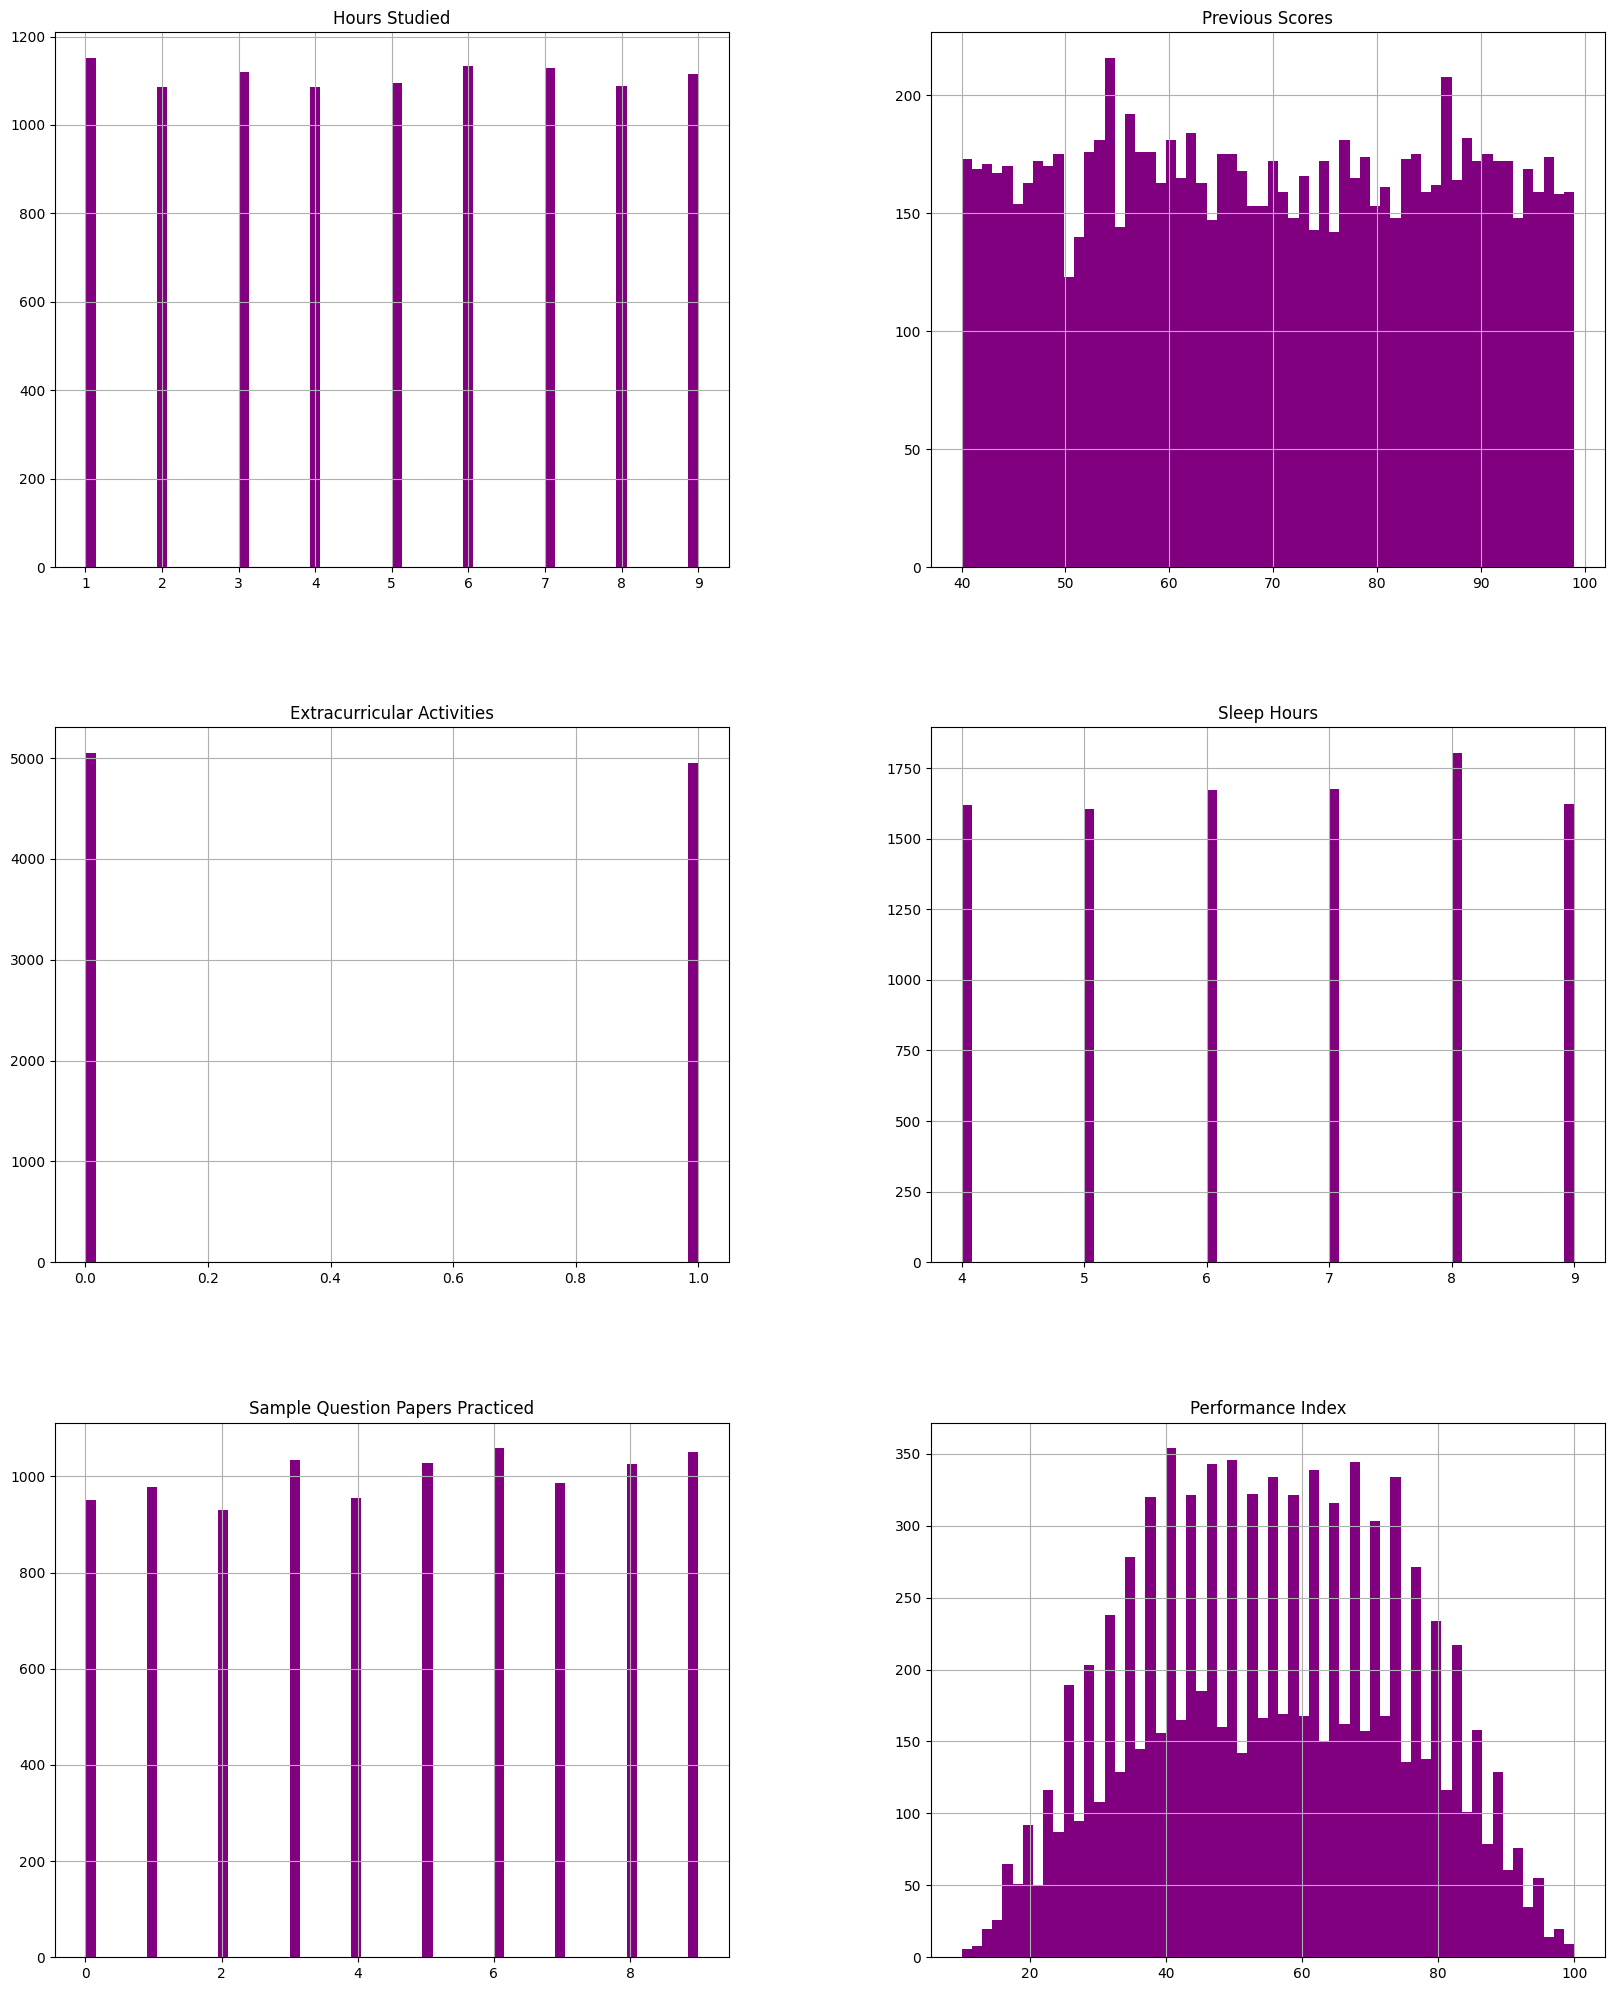

In [136]:
df.hist(bins=60, figsize=(20,25), color='purple')
plt.show()

In [137]:
continuous_attributes = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']

In [138]:
# Describing continous attributes
for attribute in continuous_attributes:
  print(df[attribute].describe())

count    10000.000000
mean         4.992900
std          2.589309
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Hours Studied, dtype: float64
count    10000.000000
mean        69.445700
std         17.343152
min         40.000000
25%         54.000000
50%         69.000000
75%         85.000000
max         99.000000
Name: Previous Scores, dtype: float64
count    10000.000000
mean         0.494800
std          0.499998
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Extracurricular Activities, dtype: float64
count    10000.000000
mean         6.530600
std          1.695863
min          4.000000
25%          5.000000
50%          7.000000
75%          8.000000
max          9.000000
Name: Sleep Hours, dtype: float64
count    10000.000000
mean         4.583300
std          2.867348
min          0.000000
25%          2.000000
50%          5.000000
75%    

Histogram above helps in understanding the distribution of data.

# **Correlation**
- Analyze and discuss the relationships between the data attributes, and between the data attributes and label.
- This involves computing the Pearson Correlation Coefficient (PCC) and generating
scatter plots

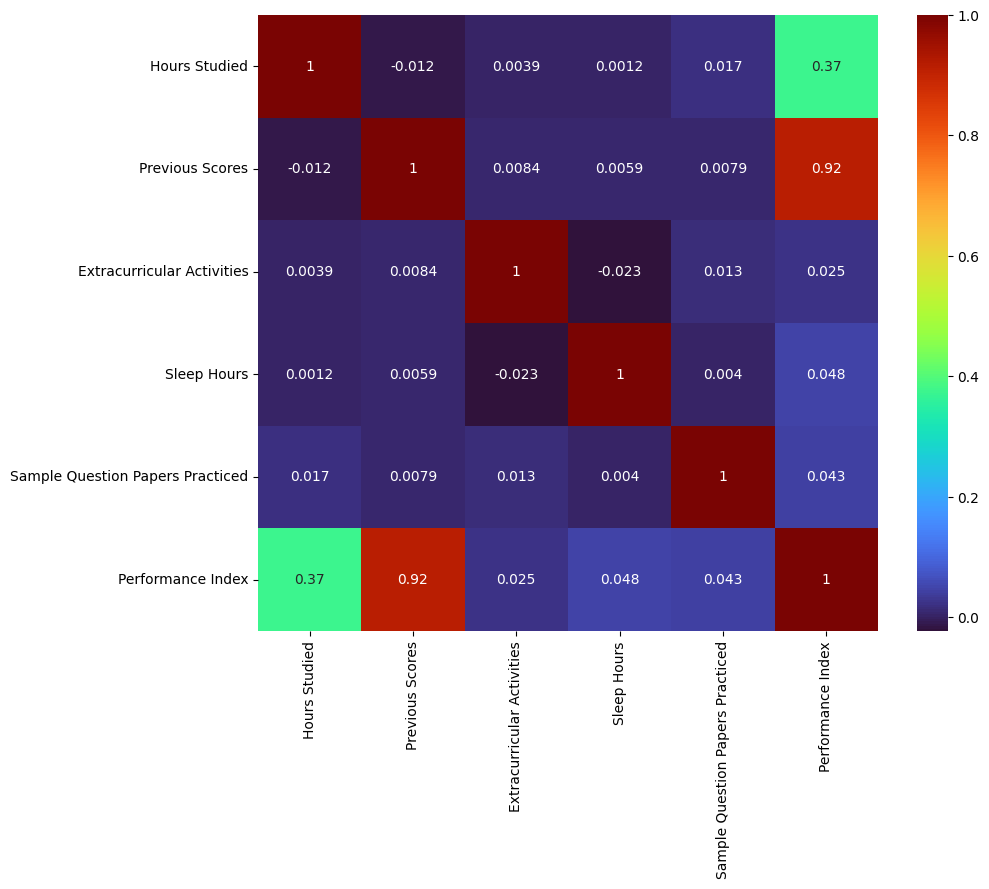

In [139]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="turbo")
plt.show()

- From the correlation matrix plotted above, a perfect negative linear relationship is seen (if one attribute increases, the other decreases)
- The target variable **Performance Index** has a strong correlation with **Previous Score**.

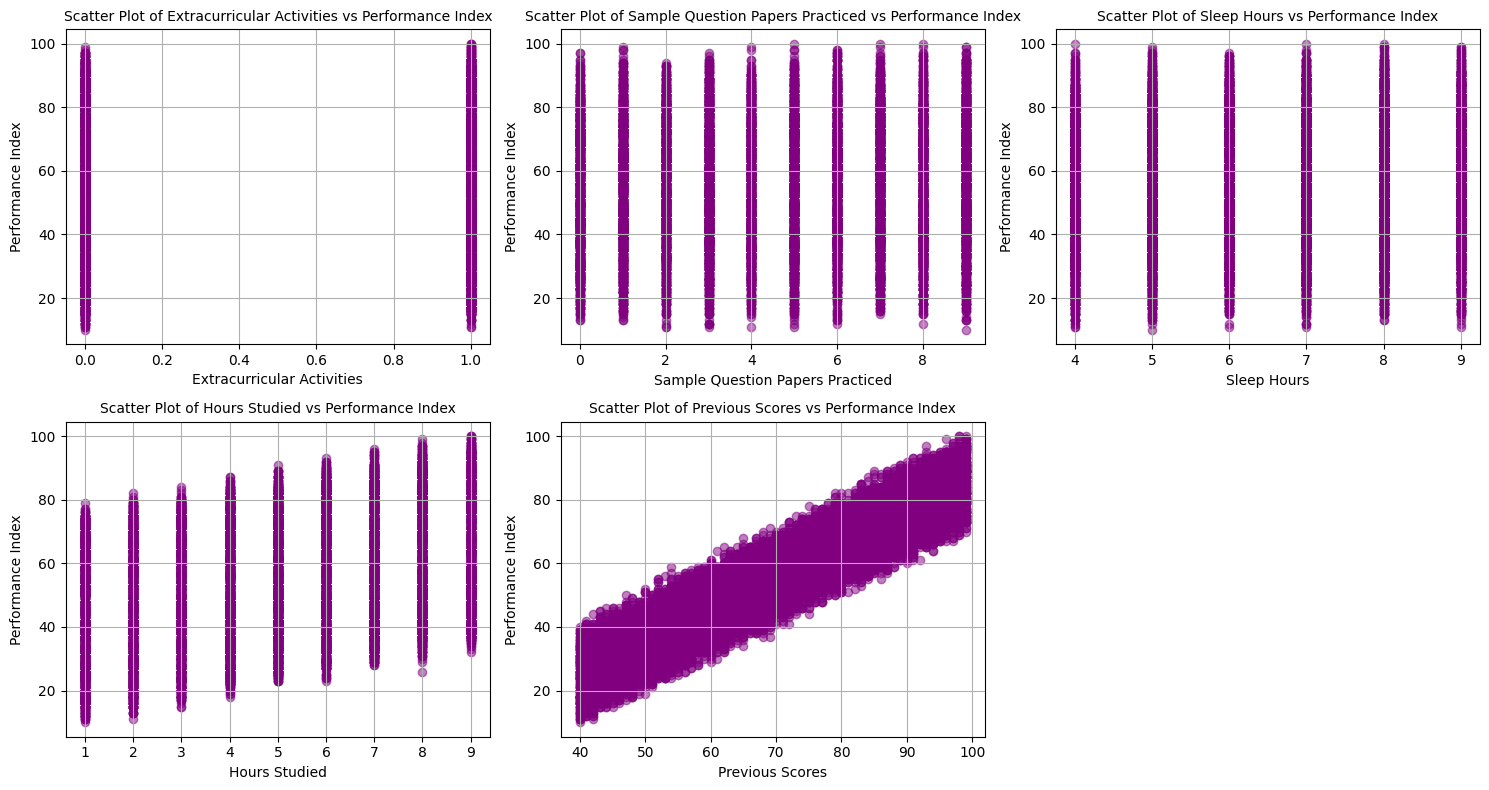

In [140]:
subplots_per_row = 3
label = "Performance Index"
correlation_result = {}

# Assuming continuous_attributes is a list of continuous attributes in your dataset
for attribute in continuous_attributes:
    pcc = np.corrcoef(df[attribute], df[label])
    correlation_result[attribute] = pcc[0, 1]

# Sorting the attributes according to their PCC values
sorted_attributes = {k: v for k, v in sorted(correlation_result.items(), key=lambda item: item[1])}

# Calculate the number of rows needed for subplots
num_rows = len(sorted_attributes) // subplots_per_row + 1

# Create subplots
fig, axes = plt.subplots(
    nrows=num_rows,
    ncols=subplots_per_row,
    figsize=(15, 4 * num_rows)
)

# Iterate through the attributes and create scatter plots
for idx, (attribute, pcc) in enumerate(sorted_attributes.items()):
    row, col = idx // subplots_per_row, idx % subplots_per_row
    ax = axes[row, col]
    ax.scatter(df[attribute], df[label], alpha=0.5, c='#800080')
    ax.set_title(f'Scatter Plot of {attribute} vs Performance Index', fontsize=10)
    ax.set_xlabel(attribute)
    ax.set_ylabel(label)
    ax.grid(True)

# Remove empty subplots if needed
for idx in range(len(sorted_attributes), len(axes.flat)):
    fig.delaxes(axes.flatten()[idx])

# Adjust spacing
plt.tight_layout()
plt.show()

The scatter plots are plotted for every continuous variable with the target variable.

# **D - Splitting of Data for Training and Testing**

- Select 20% of the data for testing.
- Describe how you did that and verify that your test portion of the data is
representative of the entire dataset.

In [141]:
from sklearn.model_selection import train_test_split
# Split the data into training and test (80% training and 20% test)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [142]:
# Distribution of classes in train and test datasets
continuos_train = train_data[continuous_attributes]
continuos_test = test_data[continuous_attributes]
print("Total data in dataset (rows): ", df.shape[0])
print(df.value_counts())
print("-----------------------------------------------------------------------------")
print("80% train data: ",continuos_train.value_counts())
print("-----------------------------------------------------------------------------")
print("20% test data: ", continuos_test.value_counts())

Total data in dataset (rows):  10000
Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  Sample Question Papers Practiced  Performance Index
5              59               1                           9            0                                 45.0                 3
1              97               1                           4            5                                 73.0                 2
               83               0                           7            2                                 58.0                 2
3              66               0                           4            6                                 45.0                 2
4              70               1                           6            8                                 53.0                 2
                                                                                                                               ..
3              98               1                         

- Checking the value counts of classes or values in both the training and test datasets allows us to evaluate if the test data accurately represents the entire dataset.
- Similar distributions in both datasets indicate a reasonable split, ensuring that the test data is reflective of the overall dataset. This alignment is crucial for fair evaluations of machine learning models, as the test dataset should encompass diverse examples mirroring real-world scenarios.
- Divergent distributions between training and test datasets may result in biased model assessments.

# **E - Training the model - Linear Regression**




- Train a Linear Regression model using the training data with four-fold crossvalidation using appropriate evaluation metric. Do this with a closed-form solution (using
the Normal Equation or SVD) and with SGD.

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [144]:
X_train = train_data[continuous_attributes] #Defining features (X) and target (y)
y_train = train_data['Performance Index']
X_test = test_data[continuous_attributes]
y_test = test_data['Performance Index']
#We are adding this column of ones because it is necessary to include
#the intercept term in the linear regression model
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print('Theta value:', theta)
# Predicting on the training data
y_train_pred = X_train @ theta
# Initialize Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.intercept_, lr_model.coef_

Theta value: [-33.92194622   2.85248393   1.0169882    0.60861668   0.47694148
   0.19183144]


(-33.92194621555628,
 array([0.        , 2.85248393, 1.0169882 , 0.60861668, 0.47694148,
        0.19183144]))

In [145]:
# 4-fold cross-validation for RMSE score
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
#root mean squared error (RMSE) for each fold
rmse_scores = np.sqrt(-cv_scores)
print("Linear Regression model using the Normal Equation - RMSE\n")
# RMSE scores for each fold
for i, rmse in enumerate(rmse_scores):
  print(f'Fold {i+1} RMSE: {rmse:.4f}')
# average RMSE across all folds
avg_rmse = np.mean(rmse_scores)
print(f'Average RMSE: {avg_rmse:.4f}')

Linear Regression model using the Normal Equation - RMSE

Fold 1 RMSE: 2.0751
Fold 2 RMSE: 2.0249
Fold 3 RMSE: 2.0290
Fold 4 RMSE: 2.0449
Average RMSE: 2.0435


In [146]:
#4-fold cross-validation for R2 score
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=4, scoring='r2')
print("Linear Regression model using the Normal Equation - R2 Score\n")
# R2 scores for each fold
for i, r2 in enumerate(r2_scores):
  print(f'Fold {i+1} R2: {r2:.4f}')
# average R2 across all folds
avg_r2 = np.mean(r2_scores)
print(f'Average R2: {avg_r2:.4f}')

Linear Regression model using the Normal Equation - R2 Score

Fold 1 R2: 0.9885
Fold 2 R2: 0.9888
Fold 3 R2: 0.9885
Fold 4 R2: 0.9888
Average R2: 0.9887


<Figure size 1000x1000 with 0 Axes>

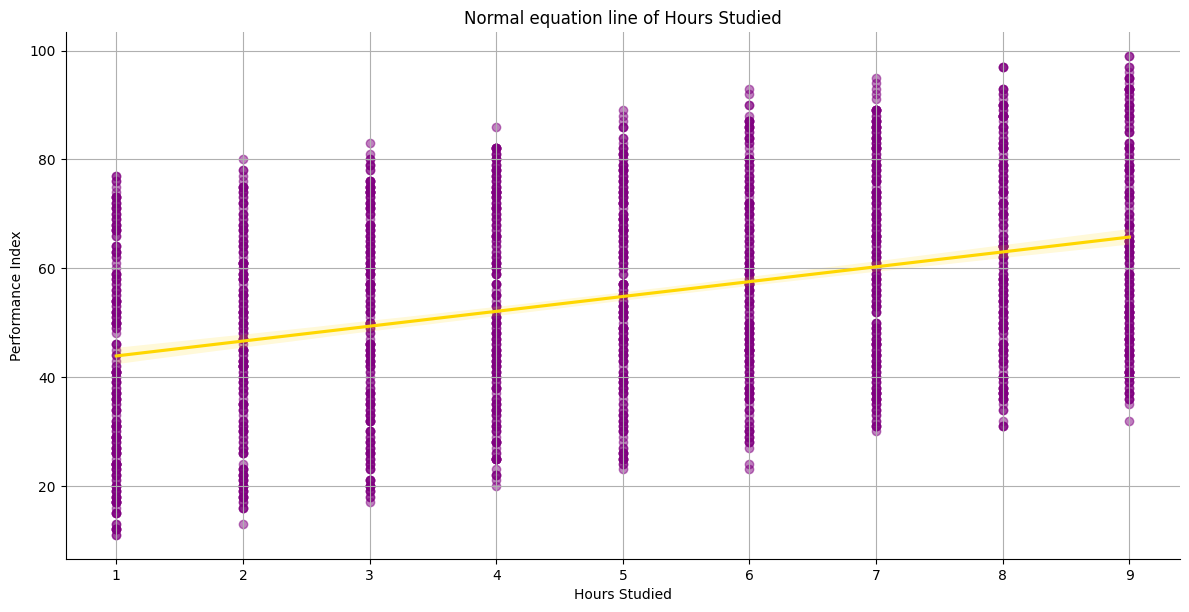

<Figure size 1000x1000 with 0 Axes>

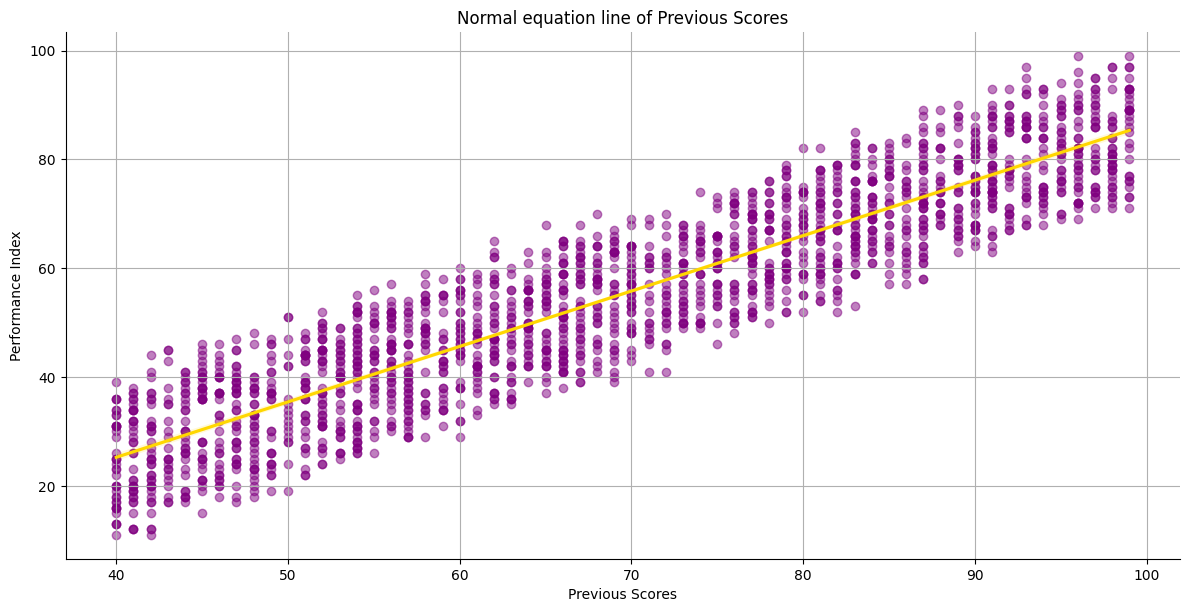

<Figure size 1000x1000 with 0 Axes>

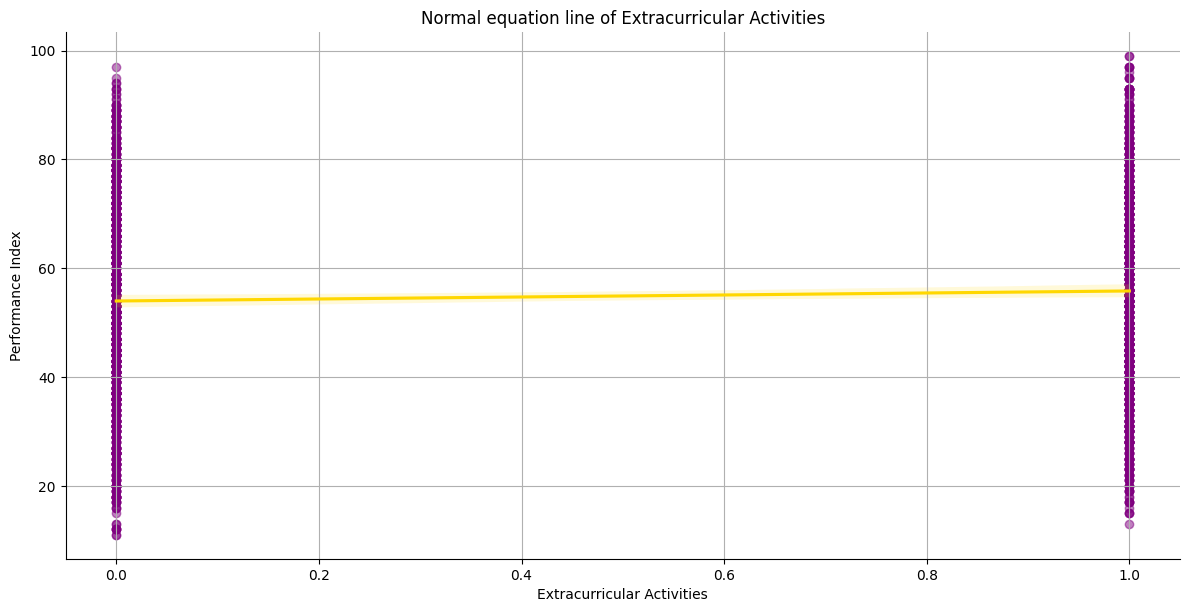

<Figure size 1000x1000 with 0 Axes>

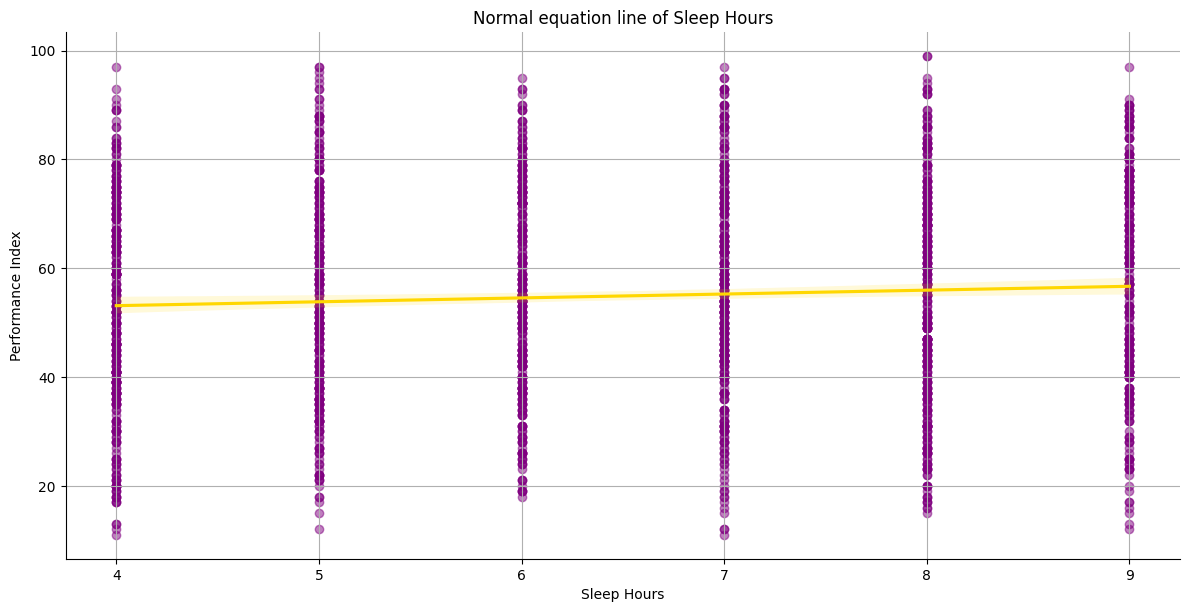

<Figure size 1000x1000 with 0 Axes>

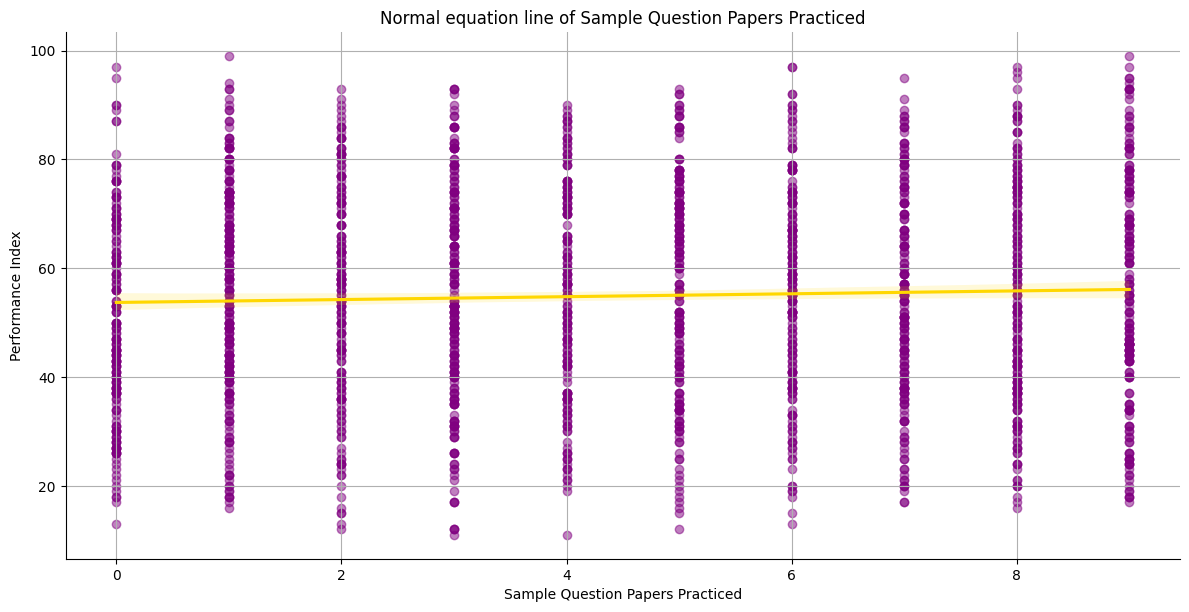

In [147]:
for attribute in continuous_attributes:
  plt.figure(figsize=(10, 10))
  sns.lmplot(x=attribute, y='Performance Index', data=test_data, aspect=2, height=6, scatter_kws={'color': '#800080', 'alpha': 0.5}, line_kws={'color': 'gold'})
  plt.xlabel(attribute)
  plt.ylabel('Performance Index')
  plt.title(f'Normal equation line of {attribute}')
  plt.grid(True)
  plt.show()

In [148]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [149]:
# Define features (X) and target (y)
X_train = train_data[continuous_attributes]
y_train = train_data['Performance Index']
# Data Pre-Processing (Normalizing)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_scaled, y_train.ravel())
sgd_reg.intercept_, sgd_reg.coef_ # intercepts and coefficients

(array([55.34846415]),
 array([ 7.39319546, 17.59244312,  0.35118134,  0.79214032,  0.73961377]))

In [150]:
# 4-fold cross-validation for RMSE score
cv_scores = cross_val_score(sgd_reg, X_scaled, y_train, cv=4, scoring='neg_mean_squared_error')
# Calculating the root mean squared error (RMSE) for each fold
rmse_scores = np.sqrt(-cv_scores)
print("Linear Regression model using SGD - RMSE\n")
for i, rmse in enumerate(rmse_scores):
  print(f'Fold {i+1} RMSE: {rmse:.4f}')
# Calculating and printing the average RMSE across all folds
avg_rmse = np.mean(rmse_scores)
print(f'Average RMSE: {avg_rmse:.4f}')

Linear Regression model using SGD - RMSE

Fold 1 RMSE: 2.0775
Fold 2 RMSE: 2.0345
Fold 3 RMSE: 2.0533
Fold 4 RMSE: 2.0611
Average RMSE: 2.0566


In [151]:
r2_scores = cross_val_score(sgd_reg, X_scaled, y_train, cv=4, scoring='r2')
print("Linear Regression model using SGD - R2 Score\n")
# R2 scores for each fold
for i, r2 in enumerate(r2_scores):
  print(f'Fold {i+1} R2: {r2:.4f}')
# average R2 across all folds
avg_r2 = np.mean(r2_scores)
print(f'Average R2: {avg_r2:.4f}')

Linear Regression model using SGD - R2 Score

Fold 1 R2: 0.9885
Fold 2 R2: 0.9888
Fold 3 R2: 0.9882
Fold 4 R2: 0.9887
Average R2: 0.9886


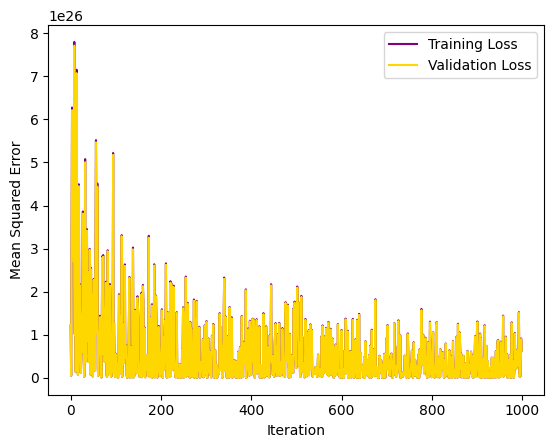

In [152]:
train_losses = []
val_losses = []
n_iterations = 1000
# Train and record loss for each iteration
for i in range(n_iterations):
  sgd_reg.partial_fit(X_train, y_train)
  y_train_pred = sgd_reg.predict(X_train)
  y_test_pred = sgd_reg.predict(X_test)
  train_loss = mean_squared_error(y_train, y_train_pred)
  val_loss = mean_squared_error(y_test, y_test_pred)
  train_losses.append(train_loss)
  val_losses.append(val_loss)
# Plot training and validation loss
plt.plot(range(n_iterations), train_losses, label='Training Loss', color ='#800080')
plt.plot(range(n_iterations), val_losses, label='Validation Loss', color ='#FFD700' )
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

**Training Loss**
- Initially, the training loss is relatively high, but it steadily decreases as the model learns
from the training data.
- The curve showed some fluctuations, but it generally trends downwards, indicating that the model is improving its fit to the training data.

**Validation loss**
- Similar to the training loss, the validation loss is relatively high at the beginning and then decreases.
- A decreasing validation loss indicates that the model is learning to
make better predictions on new, unseen examples.

# **E - Regularization**
**(Ridge, Lasso, and Elastic Net Regularization)**

In [153]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [154]:
X = train_data[continuous_attributes].values
y = train_data['Performance Index'].values

# Alpha values to try for regularization
alpha_values = [0.1, 1.0, 5.0]

# Ridge Regression
print("Ridge Regression:")
for alpha in alpha_values:
    ridge_reg = Ridge(alpha=alpha)
    mse_scores = -cross_val_score(ridge_reg, X, y, cv=4, scoring='neg_mean_squared_error')
    mean_mse = np.mean(mse_scores)
    print(f'Alpha = {alpha}, Mean MSE: {mean_mse:.4f}')

# Lasso Regression
print("\nLasso Regression:")
for alpha in alpha_values:
    lasso_reg = Lasso(alpha=alpha)
    mse_scores = -cross_val_score(lasso_reg, X, y, cv=4, scoring='neg_mean_squared_error')
    mean_mse = np.mean(mse_scores)
    print(f'Alpha = {alpha}, Mean MSE: {mean_mse:.4f}')

# Elastic Net
print("\nElastic Net:")
for alpha in alpha_values:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5) # l1_ratio controls the balance between L1 and L2 regularization
    mse_scores = -cross_val_score(elastic_net, X, y, cv=4, scoring='neg_mean_squared_error')
    mean_mse = np.mean(mse_scores)
    print(f'Alpha = {alpha}, Mean MSE: {mean_mse:.4f}')


Ridge Regression:
Alpha = 0.1, Mean MSE: 4.1762
Alpha = 1.0, Mean MSE: 4.1762
Alpha = 5.0, Mean MSE: 4.1762

Lasso Regression:
Alpha = 0.1, Mean MSE: 4.2228
Alpha = 1.0, Mean MSE: 4.8816
Alpha = 5.0, Mean MSE: 9.0267

Elastic Net:
Alpha = 0.1, Mean MSE: 4.2019
Alpha = 1.0, Mean MSE: 4.9195
Alpha = 5.0, Mean MSE: 12.6654


**Ridge regression is the best model as ot states the lowest MSE value and is consistent throughout the different values.**

# **E - Hyper parameter tuning**

#### - Impact of Hyper parameters - Batch size & Learning rate

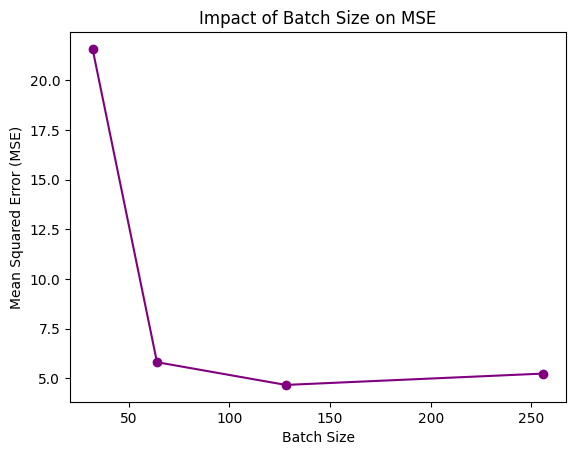

In [155]:
batch_sizes = [32, 64, 128, 256]

# Initialize an empty list to store MSE scores for each batch size
mse_scores = []

# Assuming X_train and y_train are defined
X_train = train_data[continuous_attributes].values
y_train = train_data['Performance Index'].values

# Assuming X_test and y_test are defined
X_test = test_data[continuous_attributes].values
y_test = test_data['Performance Index'].values

# Iterate through each batch size
for batch_size in batch_sizes:
    # Initialize SGDRegressor with specified parameters
    regressor = SGDRegressor(penalty=None, alpha=0.1, max_iter=1000, tol=1e-3, random_state=42)

    # Set the learning rate and warm_start parameters based on the current batch size
    regressor.set_params(learning_rate='constant', eta0=0.01 / batch_size, warm_start=True)

    # Train the regressor on the training data
    regressor.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = regressor.predict(X_test)

    # Calculate the Mean Squared Error (MSE) and append it to mse_scores
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot Batch Size vs MSE
plt.plot(batch_sizes, mse_scores, marker='o', color ='#800080')
plt.xlabel('Batch Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Impact of Batch Size on MSE')
plt.show()

As the batch size increases the MSE decreases and slightly increases further. The batch size of 130 produces optimal results.

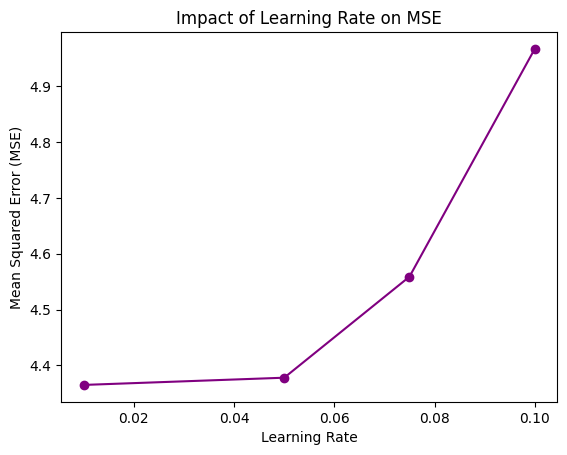

In [156]:
# Define learning rates to be tested
learning_rates = [0.01, 0.05, 0.075, 0.1]

# Initialize an empty list to store MSE scores for each learning rate
mse_scores = []

# Assuming X_train and y_train are defined
X_train = train_data[continuous_attributes].values
y_train = train_data['Performance Index'].values

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the training features
X_scaled = scaler.fit_transform(X_train)

# Iterate through each learning rate
for learning_rate in learning_rates:
    # Initialize SGDRegressor with specified parameters
    regressor = SGDRegressor(penalty=None, alpha=0.1, max_iter=1000, tol=1e-3, random_state=42)

    # Set the learning rate and warm_start parameters based on the current learning rate
    regressor.set_params(learning_rate='constant', eta0=learning_rate, warm_start=True)

    # Train the regressor on the scaled training data
    regressor.fit(X_scaled, y_train)

    # Scale the training features again for prediction
    X_train_scaled = scaler.transform(X_train)

    # Make predictions on the scaled training data
    y_pred = regressor.predict(X_train_scaled)

    # Calculate the Mean Squared Error (MSE) and append it to mse_scores
    mse = mean_squared_error(y_train, y_pred)
    mse_scores.append(mse)

# Plot Learning Rate vs MSE
plt.plot(learning_rates, mse_scores, marker='o', color ='#800080')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Impact of Learning Rate on MSE')
plt.show()

As the learning rate increases, the MSE increases exponentially. The learning rate of 0.01 produces the optimal result.

# **F - Polynominal Regression**

**- Polynomial Model using K-Fold with Normal form andSGD (training and validation loss)**

In [157]:
# Defining features (X) and target (y)
X_train = train_data[continuous_attributes]
y_train = train_data['Performance Index']
X_test = test_data[continuous_attributes]
y_test = test_data['Performance Index']
# Adding a column of ones to X_train for the bias term
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
#closed-form solution using the Normal Equation
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print('The value of theta is', theta)

The value of theta is [-33.92194622   2.85248393   1.0169882    0.60861668   0.47694148
   0.19183144]


In [158]:
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X_train)
X[0]
X_poly[0]

array([1.000e+00, 5.000e+00, 4.900e+01, 0.000e+00, 7.000e+00, 5.000e+00,
       1.000e+00, 5.000e+00, 4.900e+01, 0.000e+00, 7.000e+00, 5.000e+00,
       2.500e+01, 2.450e+02, 0.000e+00, 3.500e+01, 2.500e+01, 2.401e+03,
       0.000e+00, 3.430e+02, 2.450e+02, 0.000e+00, 0.000e+00, 0.000e+00,
       4.900e+01, 3.500e+01, 2.500e+01])

In [159]:
# Predicting on the training data
y_train_pred = X_train @ theta
# Initialize Linear Regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
poly_model.intercept_, poly_model.coef_

(-33.391870489987944,
 array([ 5.87323652e-15,  1.39053105e+00,  5.14858661e-01,  1.71554832e-01,
         1.20088914e-01,  9.24066630e-02,  2.49800181e-16,  1.39053105e+00,
         5.14858661e-01,  1.71554832e-01,  1.20088914e-01,  9.24066630e-02,
         2.85528073e-03,  2.73505146e-05,  3.51859945e-02,  3.47997954e-03,
         2.54364914e-04, -1.05936488e-04, -7.76943024e-04,  5.44727734e-04,
        -2.88919698e-04,  1.71554832e-01, -1.53319234e-03, -3.32331961e-03,
         1.21638891e-02,  5.15124216e-03, -6.85617338e-04]))

In [160]:
# 4-fold cross-validation for RMSE score
cv_scores = cross_val_score(poly_model, X_poly, y_train, cv=4, scoring='neg_mean_squared_error')

# Root Mean Squared Error (RMSE) for each fold
rmse_scores = np.sqrt(-cv_scores)

print("Polynomial Regression with Normal Equation\n")
# RMSE scores for each fold
for i, rmse in enumerate(rmse_scores):
    print(f'Fold {i+1} RMSE: {rmse:.4f}')

# Average RMSE across all folds
avg_rmse = np.mean(rmse_scores)
print(f'Average RMSE: {avg_rmse:.4f}')

Polynomial Regression with Normal Equation

Fold 1 RMSE: 2.0822
Fold 2 RMSE: 2.0264
Fold 3 RMSE: 2.0336
Fold 4 RMSE: 2.0445
Average RMSE: 2.0467


In [161]:
# 4-fold cross-validation for R2 score
r2_scores = cross_val_score(poly_model, X_poly, y_train, cv=4, scoring='r2')
print("Polynomial Regression with Normal Equation\n")
#R2 scores for each fold
for i, r2 in enumerate(r2_scores):
  print(f'Fold {i+1} R2: {r2:.4f}')
#average R2 across all folds
avg_r2 = np.mean(r2_scores)
print(f'Average R2: {avg_r2:.4f}')

Polynomial Regression with Normal Equation

Fold 1 R2: 0.9884
Fold 2 R2: 0.9888
Fold 3 R2: 0.9885
Fold 4 R2: 0.9888
Average R2: 0.9886


- **SGD Polynomial Regression**

In [162]:
# Define features (X) and target (y)
X_train = train_data[continuous_attributes]
y_train = train_data['Performance Index']
# Initialize Polynomial Regression with SGD Regressor
degree = 2
sgd_poly_reg = make_pipeline(
PolynomialFeatures(degree),
StandardScaler(),
SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
)
# Train the model
sgd_poly_reg.fit(X_train, y_train)
# Predict on the training data
y_train_pred = sgd_poly_reg.predict(X_train)
# Performing 4-fold cross-validation for RMSE score
cv_scores = cross_val_score(sgd_reg, X_scaled, y_train, cv=4, scoring='neg_mean_squared_error')
# Calculating the root mean squared error (RMSE) for each fold
rmse_scores = np.sqrt(-cv_scores)
# Printing the RMSE scores for each fold
for i, rmse in enumerate(rmse_scores):
  print(f'Fold {i+1} RMSE: {rmse:.4f}')
# Calculating and printing the average RMSE across all folds
avg_rmse = np.mean(rmse_scores)
print(f'Average RMSE: {avg_rmse:.4f}')

Fold 1 RMSE: 2.0781
Fold 2 RMSE: 2.0338
Fold 3 RMSE: 2.0509
Fold 4 RMSE: 2.0699
Average RMSE: 2.0582


In [163]:
# Performing 4-fold cross-validation for R2 score
r2_scores = cross_val_score(sgd_reg, X_scaled, y_train, cv=4, scoring='r2')
# Printing the R2 scores for each fold
for i, r2 in enumerate(r2_scores):
  print(f'Fold {i+1} R2: {r2:.4f}')
# Calculating and printing the average R2 across all folds
avg_r2 = np.mean(r2_scores)
print(f'Average R2: {avg_r2:.4f}')

Fold 1 R2: 0.9882
Fold 2 R2: 0.9888
Fold 3 R2: 0.9884
Fold 4 R2: 0.9887
Average R2: 0.9885


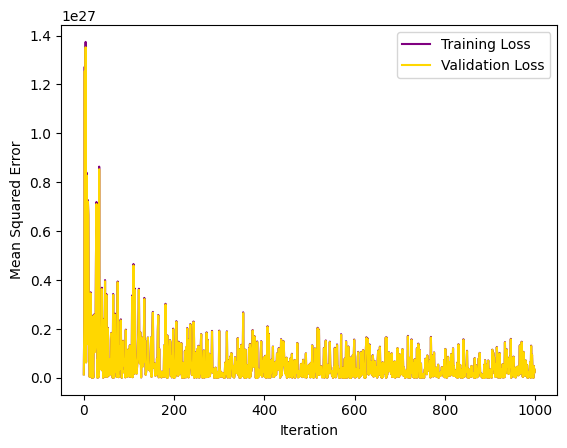

In [164]:
# Initialize SGD Regressor
sgd_poly_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
train_losses = []
val_losses = []
n_iterations = 1000
# Train and record loss for each iteration
for i in range(n_iterations):
  sgd_poly_reg.partial_fit(X_train, y_train)
  y_train_pred = sgd_poly_reg.predict(X_train)
  y_test_pred = sgd_poly_reg.predict(X_test)
  train_loss = mean_squared_error(y_train, y_train_pred)
  val_loss = mean_squared_error(y_test, y_test_pred)
  train_losses.append(train_loss)
  val_losses.append(val_loss)

# Plot training and validation loss
plt.plot(range(n_iterations), train_losses, label='Training Loss', color ='#800080')
plt.plot(range(n_iterations), val_losses, label='Validation Loss', color ='#FFD700')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

The above code trains an SGD Regressor for 1000 iterations, using partial-fit to iteratively update the model. It records and plots the mean squared error loss for both the training and validation datasets, offering a concise visualization of the model's performance changes during training.

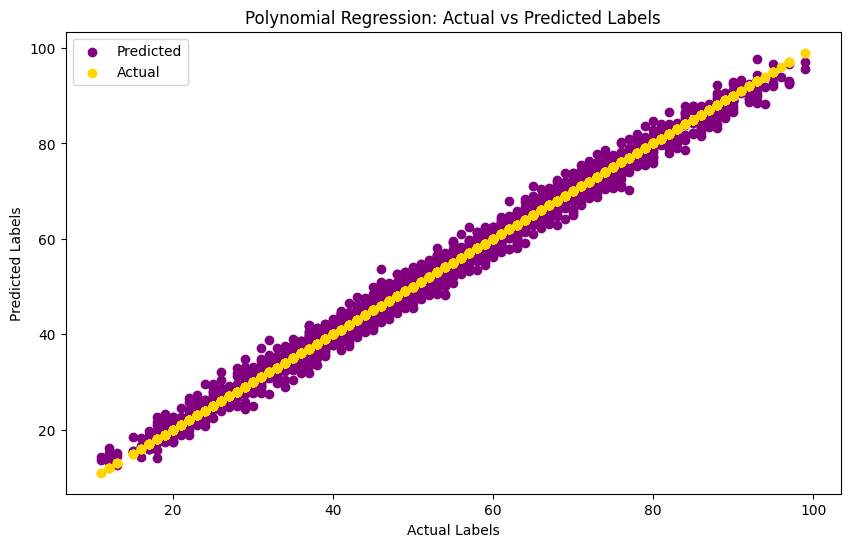

Train MSE: 4.164290147611316
Validation MSE: 4.080643106151414
The model is overfitting


In [165]:
# Create polynomial features of degree 2 for both training and test data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_poly, y_train)

# Predict on training and validation data
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate MSE for training and validation data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Visualize Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='#800080', label='Predicted')
plt.scatter(y_test, y_test, color='#FFD700', label='Actual')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Polynomial Regression: Actual vs Predicted Labels')
plt.legend()
plt.show()

# Print MSE for training and validation data
print(f"Train MSE: {train_mse}")
print(f"Validation MSE: {test_mse}")

# Compare training and validation loss
if train_mse < test_mse:
    print("The model is underfitting")
elif train_mse > test_mse:
    print("The model is overfitting")
else:
    print("The model is neither overfitting nor underfitting")

 - **Ridge, Lasso and Elastic Net Regularization with Polynomial Regression**

In [166]:
# Define features (X) and target (y)
X = train_data[continuous_attributes].values
y = train_data['Performance Index'].values

# Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Define a range of alpha values to try for regularization
alpha_values = [0.1, 1.0, 5.0]

# Ridge Regression
print("Ridge Regression:")
for alpha in alpha_values:
    ridge_reg = Ridge(alpha=alpha)
    mse_scores = -cross_val_score(ridge_reg, X_poly, y, cv=4, scoring='neg_mean_squared_error')
    mean_mse = np.mean(mse_scores)
    print(f'Alpha = {alpha}, Mean MSE: {mean_mse:.4f}')

# Lasso Regression
print("\nLasso Regression:")
for alpha in alpha_values:
    lasso_reg = Lasso(alpha=alpha)
    mse_scores = -cross_val_score(lasso_reg, X_poly, y, cv=4, scoring='neg_mean_squared_error')
    mean_mse = np.mean(mse_scores)
    print(f'Alpha = {alpha}, Mean MSE: {mean_mse:.4f}')

# Elastic Net
print("\nElastic Net:")
for alpha in alpha_values:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)  # l1_ratio controls the balance between L1 and L2 regularization
    mse_scores = -cross_val_score(elastic_net, X_poly, y, cv=4, scoring='neg_mean_squared_error')
    mean_mse = np.mean(mse_scores)
    print(f'Alpha = {alpha}, Mean MSE: {mean_mse:.4f}')

Ridge Regression:
Alpha = 0.1, Mean MSE: 4.1893
Alpha = 1.0, Mean MSE: 4.1893
Alpha = 5.0, Mean MSE: 4.1892

Lasso Regression:
Alpha = 0.1, Mean MSE: 4.2675
Alpha = 1.0, Mean MSE: 5.5447
Alpha = 5.0, Mean MSE: 8.6540

Elastic Net:
Alpha = 0.1, Mean MSE: 4.3355
Alpha = 1.0, Mean MSE: 5.4248
Alpha = 5.0, Mean MSE: 7.8702


**Ridge regression is the best model as ot states the lowest MSE value and is consistent throughout the different values.**

- **Hyperparameter Tuning**

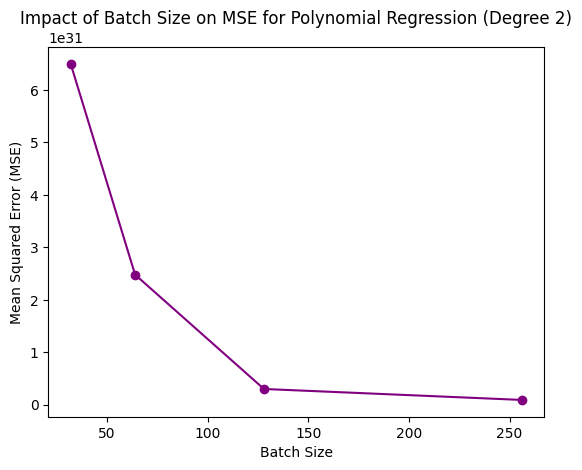

In [167]:
# Create polynomial features of degree 2 for both training and test data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

batch_sizes = [32, 64, 128, 256] # Adjust as needed
mse_scores_poly = []

for batch_size in batch_sizes:
    regressor = SGDRegressor(penalty=None, alpha=0.1, max_iter=1000, tol=1e-3, random_state=42)
    regressor.set_params(learning_rate='constant', eta0=0.01 / batch_size, warm_start=True)
    regressor.fit(X_train_poly, y_train)
    y_pred_poly = regressor.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    mse_scores_poly.append(mse_poly)

# Plot Batch Size vs MSE for Polynomial Regression
plt.plot(batch_sizes, mse_scores_poly, marker='o', color='#800080')
plt.xlabel('Batch Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Impact of Batch Size on MSE for Polynomial Regression (Degree 2)')
plt.show()

As the batch size increases the MSE value decreases.

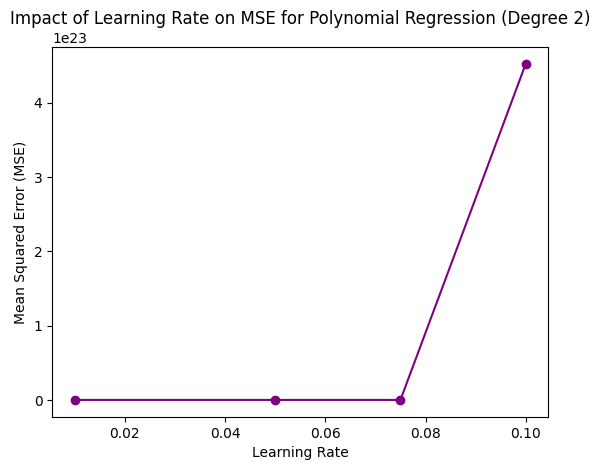

In [168]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Create polynomial features of degree 2 for both training and test data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

learning_rates = [0.01, 0.05, 0.075, 0.1]
mse_scores_poly = []

for learning_rate in learning_rates:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train_poly)

    regressor = SGDRegressor(penalty=None, alpha=0.1, max_iter=1000, tol=1e-3, random_state=42)
    regressor.set_params(learning_rate='constant', eta0=learning_rate, warm_start=True)

    regressor.fit(X_scaled, y_train)

    X_train_scaled = scaler.transform(X_train_poly)
    y_pred = regressor.predict(X_train_scaled)

    mse = mean_squared_error(y_train, y_pred)
    mse_scores_poly.append(mse)

# Plot Learning Rate vs MSE for Polynomial Regression (Degree 2)
plt.plot(learning_rates, mse_scores_poly, marker='o', color='#800080')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Impact of Learning Rate on MSE for Polynomial Regression (Degree 2)')
plt.show()


For a higher Learning Rate the MSE value becomes exceedingly high.

# **G. Make predictions of the labels on the test data using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.**

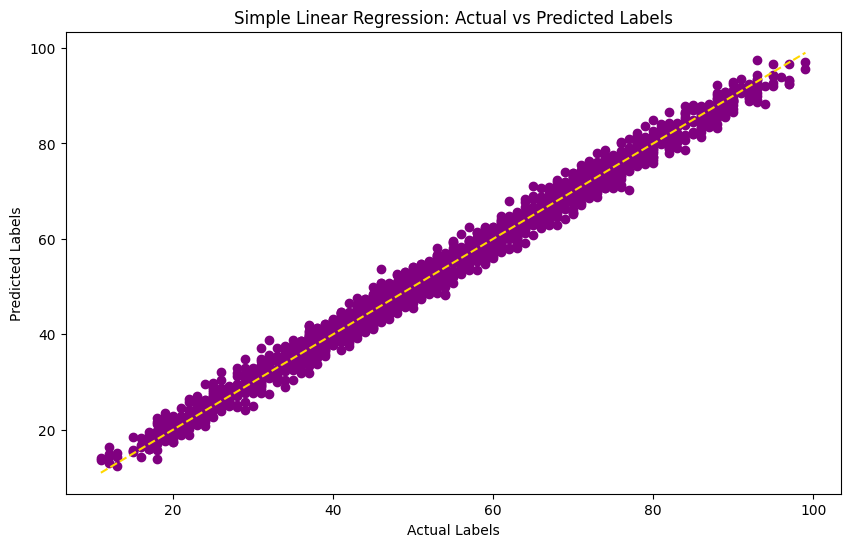

In [169]:
X_test = test_data[continuous_attributes].values

# Initialize Linear Regressor
linear_regressor = LinearRegression()

# Fit the model on the training data
linear_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_regressor.predict(X_test)

# Visualize the Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#800080')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='#FFD700')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Simple Linear Regression: Actual vs Predicted Labels')
plt.show()


In [170]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
# Print the metrics
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2) Score: {r2:.4f}')

Mean Absolute Error (MAE): 1.6111
Mean Squared Error (MSE): 4.0826
R-squared (R2) Score: 0.9890


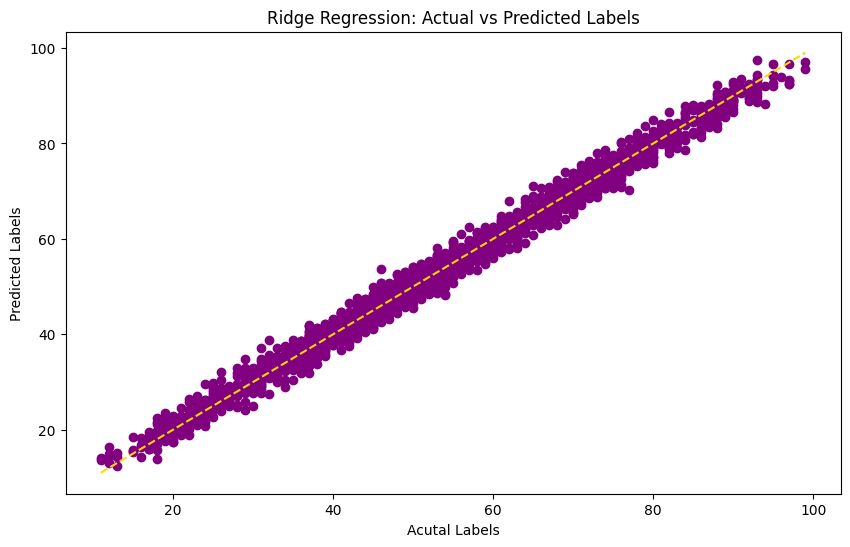

In [171]:
X_test = test_data[continuous_attributes].values
# Initialize Ridge Regressor with chosen alpha
ridge_regressor = Ridge(alpha=0.1)
# Fit the model on the training data
ridge_regressor.fit(X_train, y_train)
# Make predictions on the test data
y_pred = ridge_regressor.predict(X_test)
# Visualize the Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#800080')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--',color='#FFD700')
plt.xlabel('Acutal Labels')
plt.ylabel('Predicted Labels')
plt.title('Ridge Regression: Actual vs Predicted Labels')
plt.show()

In [172]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
# Print the metrics
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2) Score: {r2:.4f}')

Mean Absolute Error (MAE): 1.6111
Mean Squared Error (MSE): 4.0826
R-squared (R2) Score: 0.9890


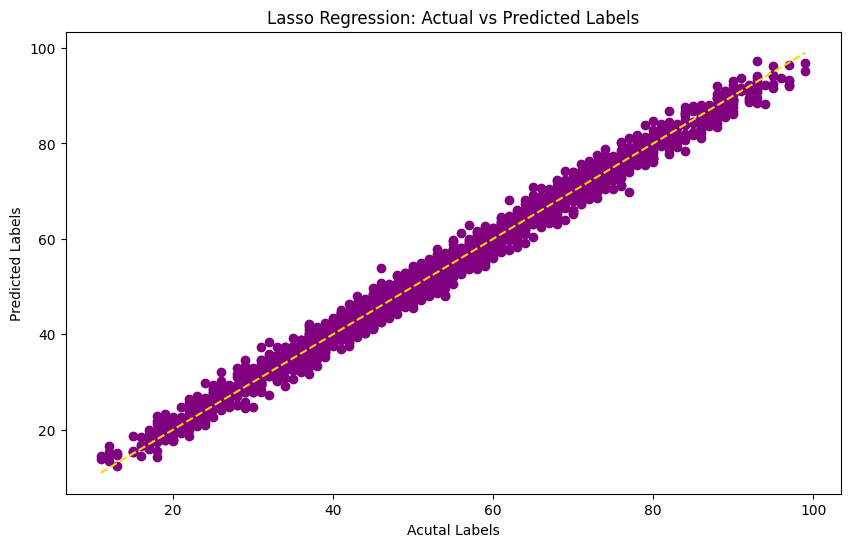

In [173]:
X_test = test_data[continuous_attributes].values
# Initialize Ridge Regressor with chosen alpha
lasso_regressor = Lasso(alpha=0.1)
# Fit the model on the training data
lasso_regressor.fit(X_train, y_train)
# Make predictions on the test data
y_pred = lasso_regressor.predict(X_test)
# Visualize the Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#800080')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='#FFD700')
plt.xlabel('Acutal Labels')
plt.ylabel('Predicted Labels')
plt.title('Lasso Regression: Actual vs Predicted Labels')
plt.show()

In [174]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
# Print the metrics
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2) Score: {r2:.4f}')

Mean Absolute Error (MAE): 1.6213
Mean Squared Error (MSE): 4.1422
R-squared (R2) Score: 0.9888


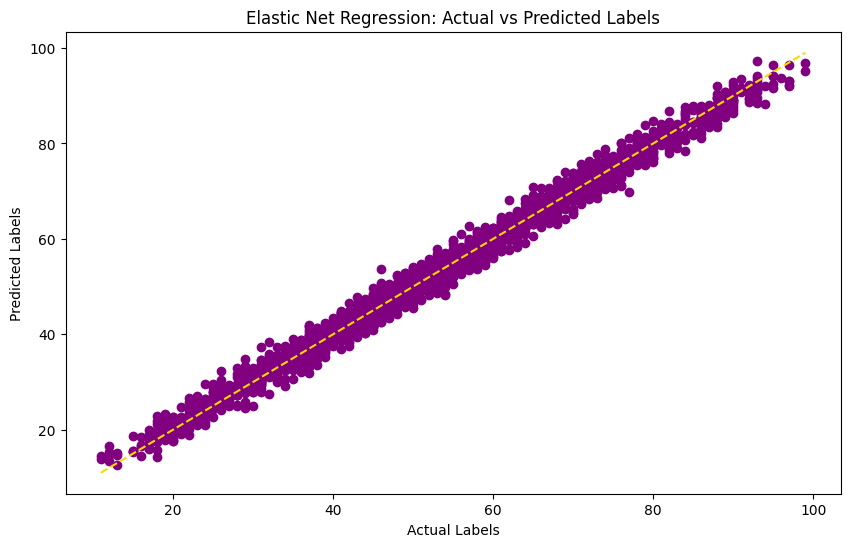

In [175]:
X_test = test_data[continuous_attributes].values
# Initialize Elastic Net Regressor
elastic_net_regressor = ElasticNet(alpha=0.1, l1_ratio=0.5)
# Fit the model on the training data
elastic_net_regressor.fit(X_train, y_train)
# Make predictions on the test data
y_pred = elastic_net_regressor.predict(X_test)
# Visualize the Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#800080')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='#FFD700')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Elastic Net Regression: Actual vs Predicted Labels')
plt.show()

In [176]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
# Print the metrics
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2) Score: {r2:.4f}')

Mean Absolute Error (MAE): 1.6164
Mean Squared Error (MSE): 4.1178
R-squared (R2) Score: 0.9889


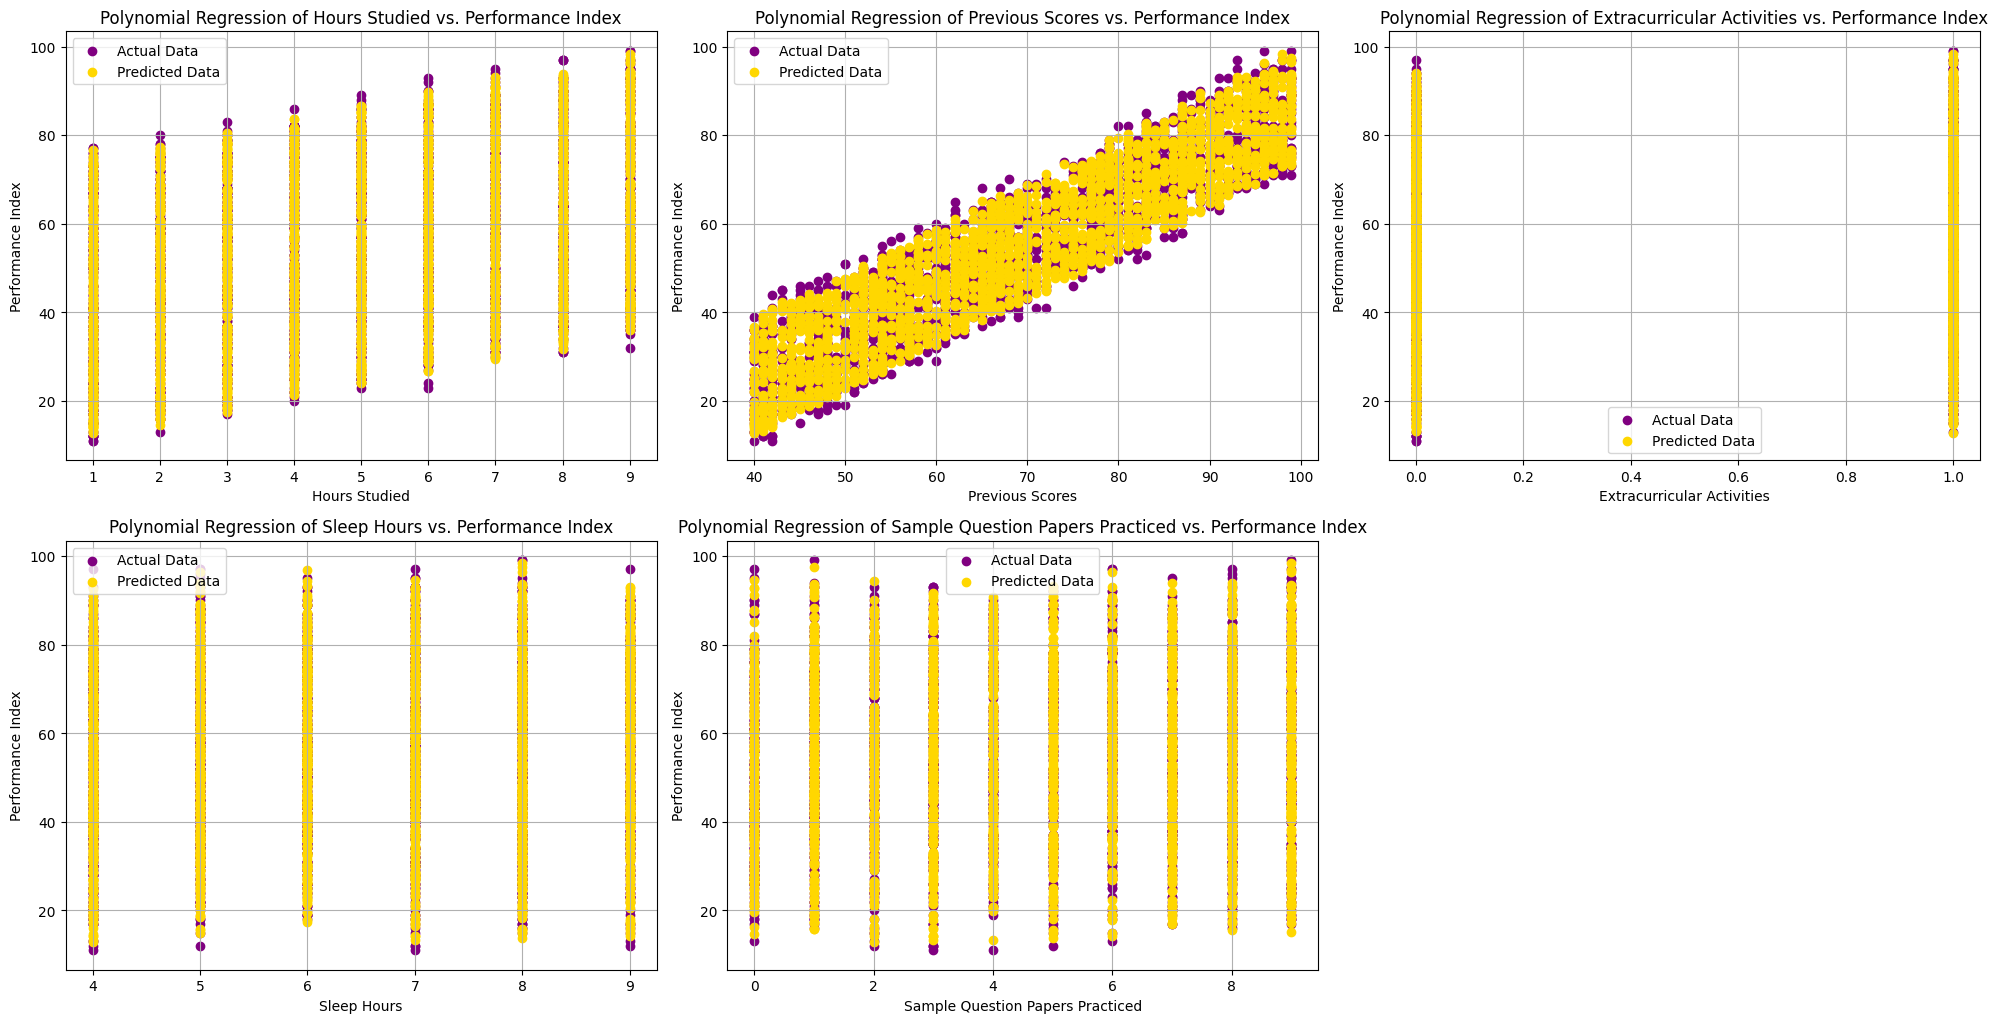

In [177]:
# Define the degree of polynomial
degree = 2
# Initialize a figure for subplots
plt.figure(figsize=(20, 15))
X_test = test_data[continuous_attributes].values
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test] # Adding a column of ones for
for i, attribute in enumerate(continuous_attributes):
  # Generate polynomial features
  poly = PolynomialFeatures(degree=degree)
  X_poly = poly.fit_transform(X_test[:, 1:]) # Exclude bias term
  # Train a linear regression model
  lr_model = LinearRegression()
  lr_model.fit(X_poly, y_test)
  # Predict on training data
  y_pred = lr_model.predict(X_poly)
  # Plot the actual vs. predicted values
  plt.subplot(3, 3, i+1)
  plt.scatter(X_test[:, i+1], y_test, color='#800080', label='Actual Data')
  plt.scatter(X_test[:, i+1], y_pred, color='#FFD700', label='Predicted Data')
  plt.xlabel(attribute)
  plt.ylabel('Performance Index')
  plt.title(f'Polynomial Regression of {attribute} vs. Performance Index')
  plt.legend()
  plt.grid(True)

plt.tight_layout()
plt.show()

In [178]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
# Print the metrics
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2) Score: {r2:.4f}')

Mean Absolute Error (MAE): 1.5981
Mean Squared Error (MSE): 4.0199
R-squared (R2) Score: 0.9892


- **Mean Absolute Error (MAE):** The average absolute difference between predicted and actual values is 1.5981. A lower MAE suggests better accuracy.

- **Mean Squared Error (MSE):** The average squared difference between predicted and actual values is 4.0199. MSE penalizes larger errors more severely, and a lower MSE is desirable.

- **R-squared (R2) Score:** The R-squared value of 0.9892 suggests that the model explains approximately 98.92% of the variance in the target variable, indicating a high level of predictive accuracy.

**Future Work**
- Exploring ensemble methods, such as Random Forests or Gradient Boosting.
- Exploring the addition of new features or transformations that may capture intricate patterns within the data.